In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import scipy as sp
import random
import os
import cv2

In [2]:
classes={'notumor':0,'glioma':1,'meningioma':2,'pituitary':3}

In [3]:
# Load and preprocessing the into trainig and testing
def load_data(path):
    images=[]
    labels=[]
    for folder in os.listdir(path):
        for file in os.listdir(path+folder):
            img=cv2.imread(path+folder+'/'+file)
            img=cv2.resize(img,(150,150))
            img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            images.append(img)
            labels.append(classes[folder])
    return images,labels

#### Dataset 1

In [4]:
x_train,y_train=load_data('Training/')

In [5]:
x_test,y_test=load_data('Testing/')

In [6]:
x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)
print("Shape of x_train: ",x_train.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of x_test: ",x_test.shape)
print("Shape of y_test: ",y_test.shape)

Shape of x_train:  (5712, 150, 150)
Shape of y_train:  (5712,)
Shape of x_test:  (1311, 150, 150)
Shape of y_test:  (1311,)


#### Analysis of class-wise data

Number of samples:  5712
Number of features:  150
Number of classes:  4
Number of samples per class: 
0: 1595
1: 1321
2: 1339
3: 1457


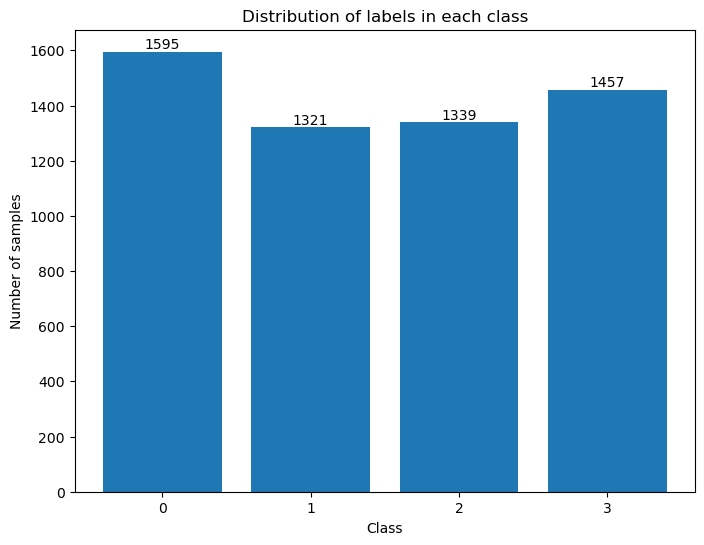

In [7]:
#analyse the dataset features
def analyse_data(x, y):
    print("Number of samples: ", x.shape[0])
    print("Number of features: ", x.shape[1])
    unique_classes, counts = np.unique(y, return_counts=True)
    print("Number of classes: ", len(unique_classes))
    print("Number of samples per class: ")
    for cls, count in zip(unique_classes, counts):
        print(f"{cls}: {count}")
    
    plt.figure(figsize=(8, 6))
    bars = plt.bar(unique_classes, counts, width=0.8, align='center')
    plt.xlabel('Class')
    plt.ylabel('Number of samples')
    plt.title('Distribution of labels in each class')
    plt.xticks(unique_classes)
    # plt.grid(True)
    for bar, count in zip(bars, counts):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count,
                 ha='center', va='bottom')

    plt.show()

analyse_data(x_train,y_train)

In [8]:
# Normalize the data
x_train=x_train/255.0
x_test=x_test/255.0

In [9]:
no_tumor=[]
glioma_tumor=[]
meningioma_tumor=[]
pituitary_tumor=[]
for i in range(len(x_train)):
    if y_train[i]==0:
        no_tumor.append(x_train[i])
    elif y_train[i]==1:
        glioma_tumor.append(x_train[i])
    elif y_train[i]==2:
        meningioma_tumor.append(x_train[i])
    else:
        pituitary_tumor.append(x_train[i])

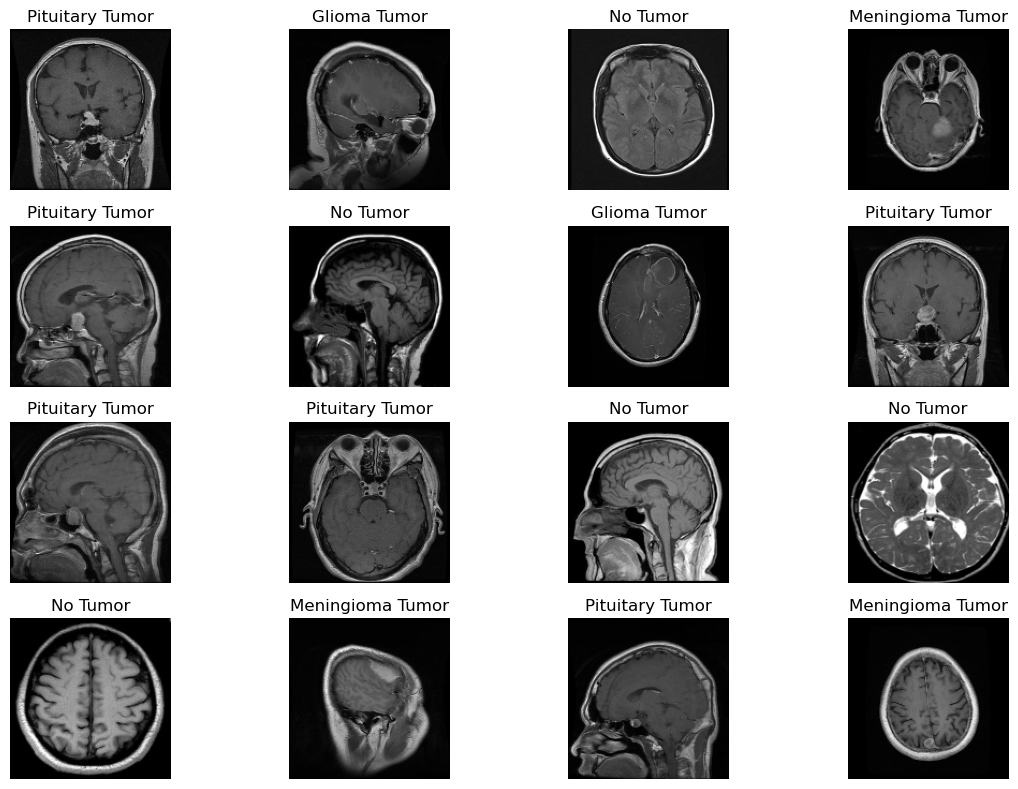

In [10]:
all_images = [(image, "No Tumor") for image in no_tumor] + [(image, "Glioma Tumor") for image in glioma_tumor] + [(image, "Meningioma Tumor") for image in meningioma_tumor] + [(image, "Pituitary Tumor") for image in pituitary_tumor]

# Shuffle the list
random.shuffle(all_images)
images=[i[0] for i in all_images]
labels=[i[1] for i in all_images]

# Plot 4 random images from each subclass with their respective labels
plt.figure(figsize=(12, 8))
for i in range(4):
    for j in range(4):
        index = i * 4 + j
        image, label = all_images[index]
        plt.subplot(4, 4, index + 1)
        plt.imshow(image, cmap='gray')
        plt.title(label)
        plt.axis('off')
plt.tight_layout()
plt.show()

#### Analyse the image

Image shape:  (150, 150)
Image type:  float64
Image min value:  0.0
Image max value:  0.9450980392156862
Image mean value:  0.12285786492374727
Image std value:  0.1692834525685626


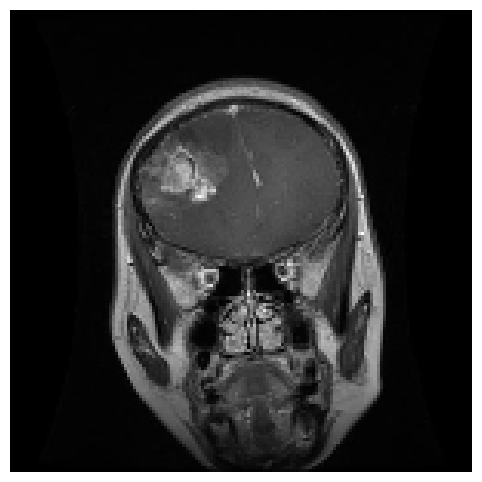

In [11]:
#perform analysis on the dataset
def analyse_image(image):
    print("Image shape: ", image.shape)
    print("Image type: ", image.dtype)
    print("Image min value: ", image.min())
    print("Image max value: ", image.max())
    print("Image mean value: ", image.mean())
    print("Image std value: ", image.std())
    plt.figure(figsize=(8, 6))
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

analyse_image(x_train[0])

#### data distribution based on first and second feature

C:\Users\user\AppData\Local\Temp\ipykernel_12536\1197963461.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('viridis', len(unique_classes))
d:\Conda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


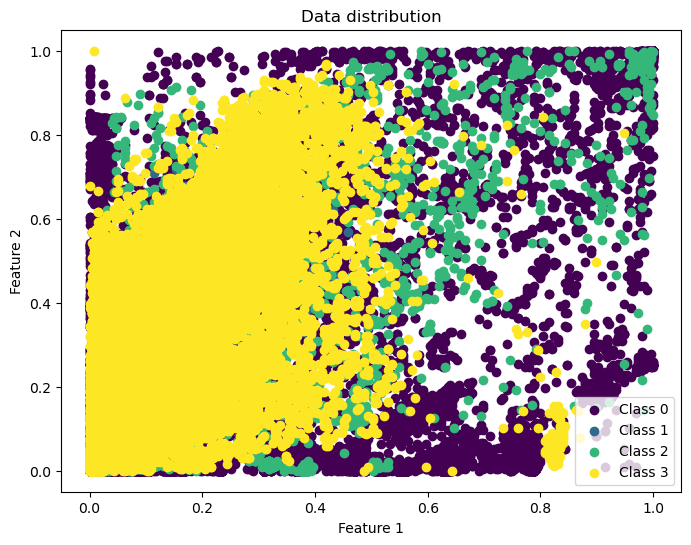

In [12]:
def plot_data(x, y):
    unique_classes = np.unique(y)
    color_map = plt.cm.get_cmap('viridis', len(unique_classes))  
    
    plt.figure(figsize=(8, 6))
    for i, cls in enumerate(unique_classes):
        class_data = x[y == cls]
        plt.scatter(class_data[:, 0], class_data[:, 1], c=[color_map(i)], label=f'Class {cls}')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Data distribution')
    plt.legend()
    # plt.grid(True)
    plt.show()

plot_data(x_train,y_train)


In [13]:
print("Before reshaping: ", x_train.shape, x_test.shape)
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])
print("After reshaping: ", x_train.shape, x_test.shape)

Before reshaping:  (5712, 150, 150) (1311, 150, 150)
After reshaping:  (5712, 22500) (1311, 22500)


In [14]:
# calculate mean and standard deviation of the training data
mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)

print("Mean shape: ", mean.shape)
print("Standard deviation shape: ", std.shape)

print("Mean ",mean)
print("Standard deviation ",std)

Mean shape:  (22500,)
Standard deviation shape:  (22500,)
Mean  [0.02290603 0.01632888 0.01690559 ... 0.01690833 0.01670786 0.02326509]
Standard deviation  [0.10381049 0.07404098 0.07591454 ... 0.07887151 0.07914765 0.1075419 ]


In [15]:
#perform PCA to reduce the number of festures to consider
from sklearn.decomposition import PCA
pca=PCA(n_components=100)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)

print("After PCA: ", x_train.shape, x_test.shape)

After PCA:  (5712, 100) (1311, 100)


C:\Users\user\AppData\Local\Temp\ipykernel_12536\1197963461.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('viridis', len(unique_classes))


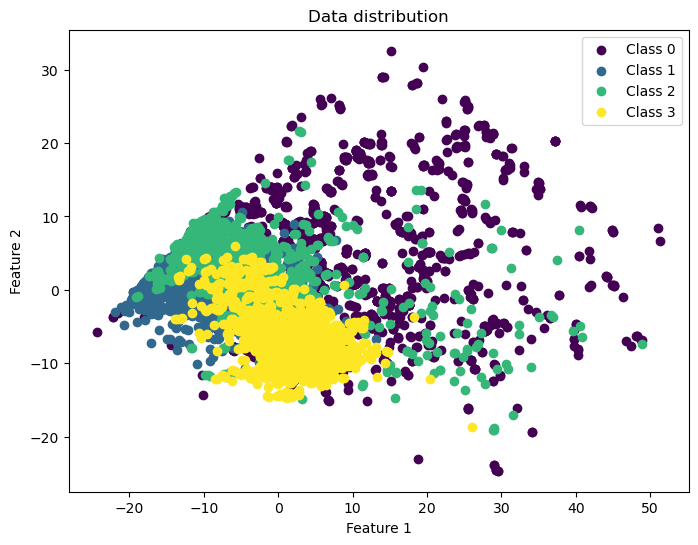

In [16]:
#data distribution based on the first two principal components
plot_data(x_train,y_train)

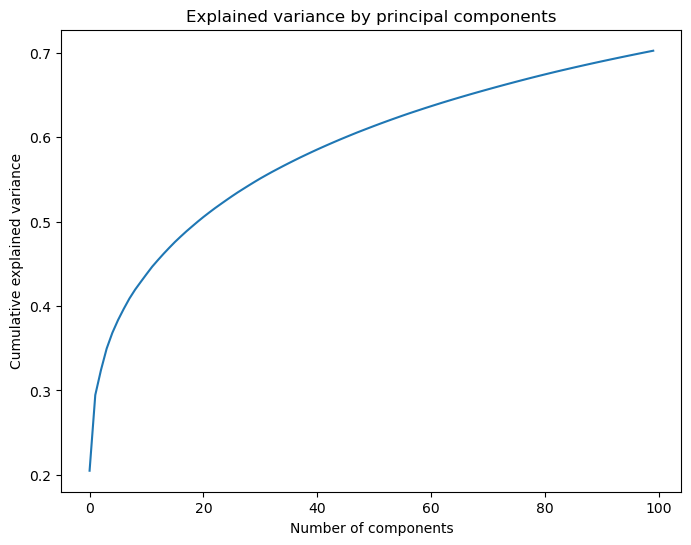

In [17]:
# check the variance explained by each principal component
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained variance by principal components')
# plt.grid(True)
plt.show()

##### From the plot we see that the data is completely non linear, yet lets try a linear model to check if that's true

In [18]:
# use SVM with a linear kernel
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm=SVC(kernel='linear')
svm.fit(x_train,y_train)

y_pred=svm.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy: ",accuracy)

Accuracy:  0.7932875667429443


[[365   8  29   3]
 [  4 231  56   9]
 [ 73  37 165  31]
 [  4  11   6 279]]
Total number of tested samples:  1311
Number of correctly classified samples:  1040


<Figure size 1000x700 with 0 Axes>

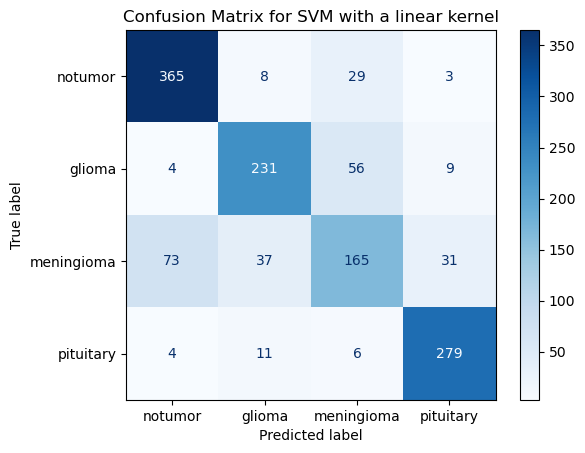

In [19]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
print(cm)

#find number of tested samples
total = np.sum(cm)
print("Total number of tested samples: ", total)
print("Number of correctly classified samples: ", np.trace(cm))


plt.figure(figsize=(10, 7))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes.keys())
disp.plot(cmap='Blues')
# plt.show()

plt.title("Confusion Matrix for SVM with a linear kernel") 
plt.show()


##### clearly 79.25% with a linear model is bad, hence we switch to non linear models

In [20]:
# use KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

y_pred=knn.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy: ",accuracy)

Accuracy:  0.8794813119755912


[[385  11   4   5]
 [  0 271  22   7]
 [ 49  36 201  20]
 [  0   0   4 296]]
Total number of tested samples:  1311
Number of correctly classified samples:  1153


<Figure size 1000x700 with 0 Axes>

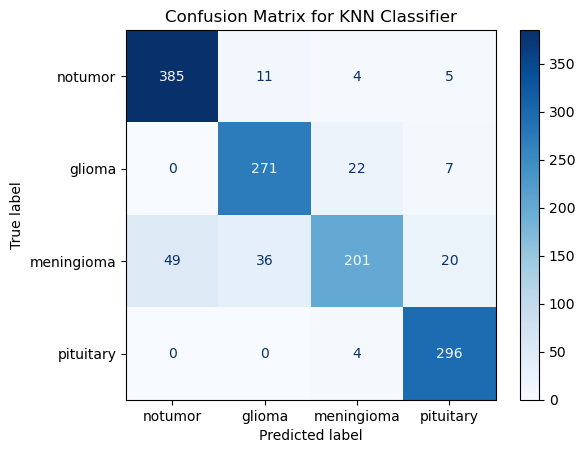

In [21]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

#find number of tested samples
total = np.sum(cm)
print("Total number of tested samples: ", total)
print("Number of correctly classified samples: ", np.trace(cm))


plt.figure(figsize=(10, 7))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes.keys())
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for KNN Classifier") 
plt.show()

##### Accuracy of 87.41% with KNN suggest that the data of a particular class is not as closely distributed which can be seen from the plot as well, hence we need to switch our models to those that can extract the features from the data i.e. the decision trees and ranodm forests

In [22]:
# use Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

y_pred=dt.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy: ",accuracy)

Accuracy:  0.8390541571319603


[[395   5   5   0]
 [  6 210  64  20]
 [ 16  36 237  17]
 [  5  13  24 258]]
Total number of tested samples:  1311
Number of correctly classified samples:  1100


<Figure size 1000x700 with 0 Axes>

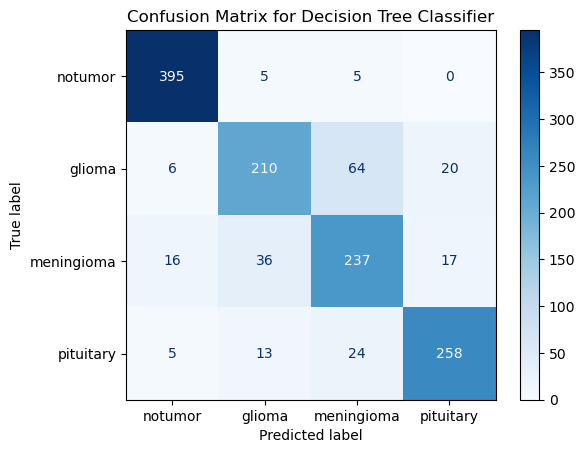

In [23]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

#find number of tested samples
total = np.sum(cm)
print("Total number of tested samples: ", total)
print("Number of correctly classified samples: ", np.trace(cm))


plt.figure(figsize=(10, 7))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes.keys())
disp.plot(cmap='Blues')

plt.title("Confusion Matrix for Decision Tree Classifier") 
plt.show()

##### grow multiple decision trees to enhance accuracy => Random forests classifier

In [24]:
# use Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)

y_pred=rf.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy: ",accuracy)

Accuracy:  0.9191456903127384


[[404   0   1   0]
 [  0 236  48  16]
 [  8  17 270  11]
 [  0   2   3 295]]
Total number of tested samples:  1311
Number of correctly classified samples:  1205


<Figure size 1000x700 with 0 Axes>

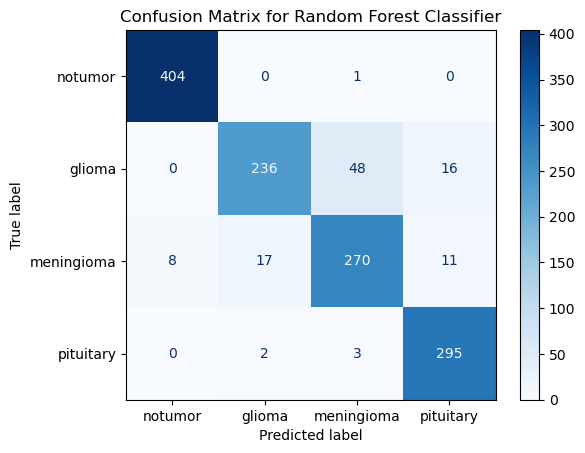

In [25]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

#find number of tested samples
total = np.sum(cm)
print("Total number of tested samples: ", total)
print("Number of correctly classified samples: ", np.trace(cm))


plt.figure(figsize=(10, 7))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes.keys())
disp.plot(cmap='Blues')

plt.title("Confusion Matrix for Random Forest Classifier") 
plt.show()

              precision    recall  f1-score   support

     notumor       0.98      1.00      0.99       405
      glioma       0.93      0.79      0.85       300
  meningioma       0.84      0.88      0.86       306
   pituitary       0.92      0.98      0.95       300

    accuracy                           0.92      1311
   macro avg       0.92      0.91      0.91      1311
weighted avg       0.92      0.92      0.92      1311



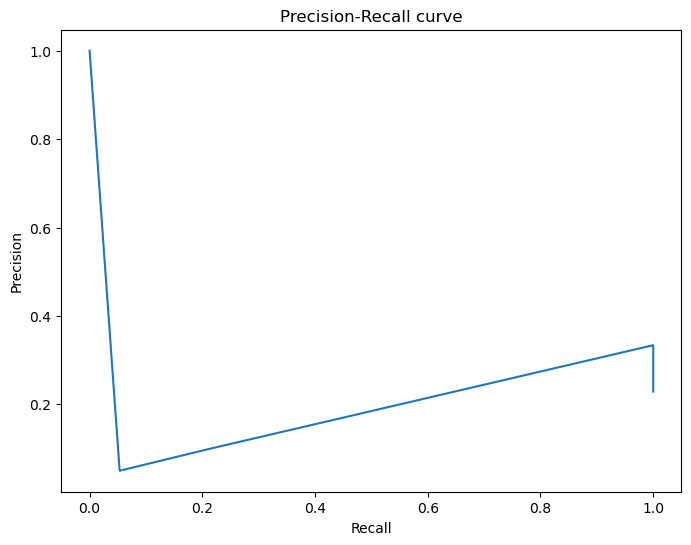

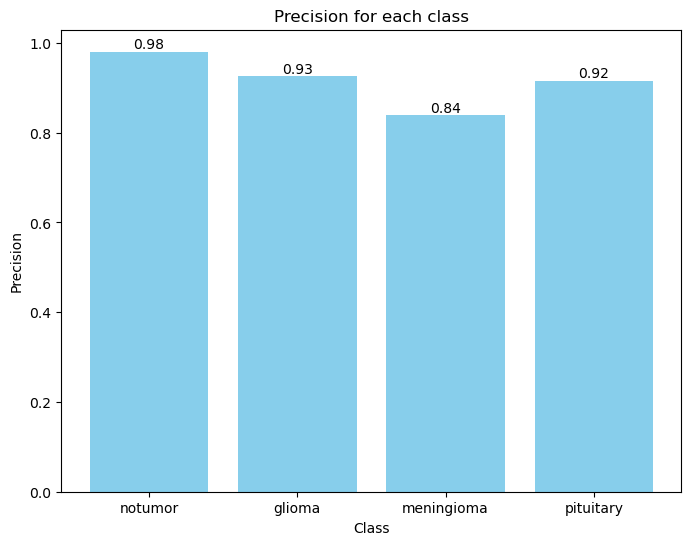

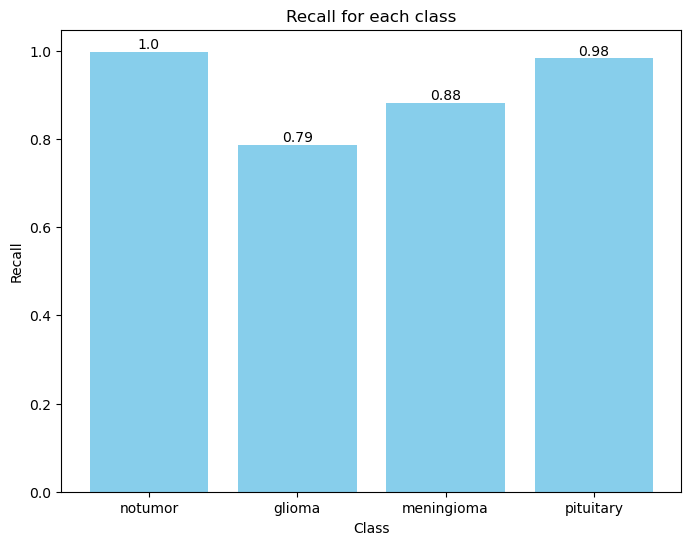

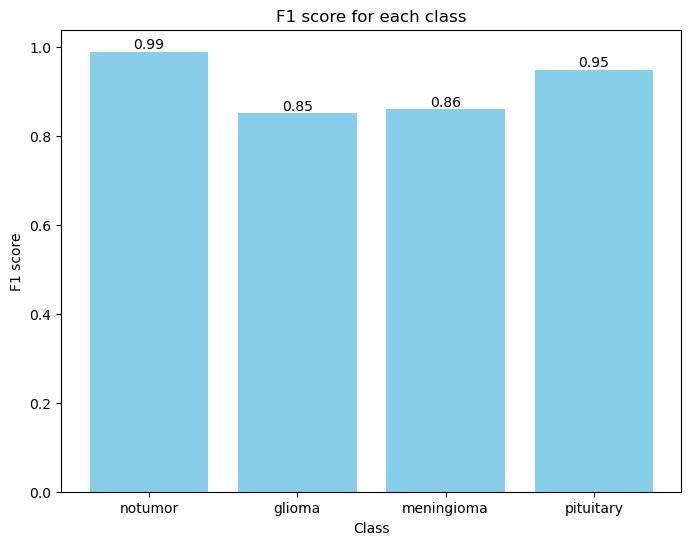

In [26]:
# presnt the classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=classes.keys()))

#plot the precision-recall curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

precision, recall, _ = precision_recall_curve(y_test, y_pred, pos_label=1)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.show()

#high precision and recall values are desired
# high precision means low false positive rate
# high recall means low false negative rate

#plot the precision for each class
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average=None)
plt.figure(figsize=(8, 6))
bars = plt.bar(classes.keys(), precision, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Precision')
plt.title('Precision for each class')

for bar, score in zip(bars, precision):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(score, 2),
             ha='center', va='bottom')

plt.show()

#plot the recall for each class
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred, average=None)
plt.figure(figsize=(8, 6))
bars = plt.bar(classes.keys(), recall, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Recall')
plt.title('Recall for each class')

for bar, score in zip(bars, recall):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(score, 2),
             ha='center', va='bottom')

plt.show()

#plot f1 score for each class = 2 * (precision * recall) / (precision + recall) , both contribute equally hence f1 gives the realiability of a model
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred, average=None)
plt.figure(figsize=(8, 6))
bars = plt.bar(classes.keys(), f1, color='skyblue')
plt.xlabel('Class')
plt.ylabel('F1 score')
plt.title('F1 score for each class')

for bar, score in zip(bars, f1):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(score, 2),
             ha='center', va='bottom')
    
plt.show()

##### We can further try to enhance the accuracy of model by considering higher dimension relationships between features like using a polynomial or a radial basis function kernel with a support vector machine

In [27]:
# use SVM with a radial basis function kernel
svm=SVC(kernel='rbf',C=5,gamma=0.01) #greater the C, lower the misclassification error and smaller the gama, the farther the distance to be considered
svm.fit(x_train,y_train)

y_pred=svm.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy: ",accuracy)

Accuracy:  0.973302822273074


[[404   0   1   0]
 [  0 285  14   1]
 [  9   9 287   1]
 [  0   0   0 300]]
Total number of tested samples:  1311
Number of correctly classified samples:  1276


<Figure size 1000x700 with 0 Axes>

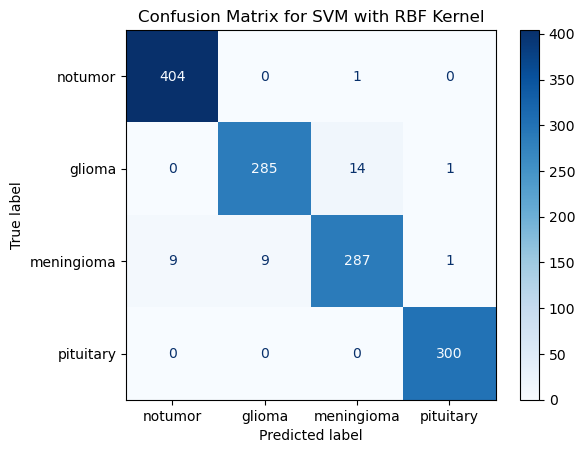

In [28]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

#find number of tested samples
total = np.sum(cm)
print("Total number of tested samples: ", total)
print("Number of correctly classified samples: ", np.trace(cm))


plt.figure(figsize=(10, 7))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes.keys())
disp.plot(cmap='Blues')

plt.title("Confusion Matrix for SVM with RBF Kernel")
plt.show()


              precision    recall  f1-score   support

     notumor       0.98      1.00      0.99       405
      glioma       0.97      0.95      0.96       300
  meningioma       0.95      0.94      0.94       306
   pituitary       0.99      1.00      1.00       300

    accuracy                           0.97      1311
   macro avg       0.97      0.97      0.97      1311
weighted avg       0.97      0.97      0.97      1311



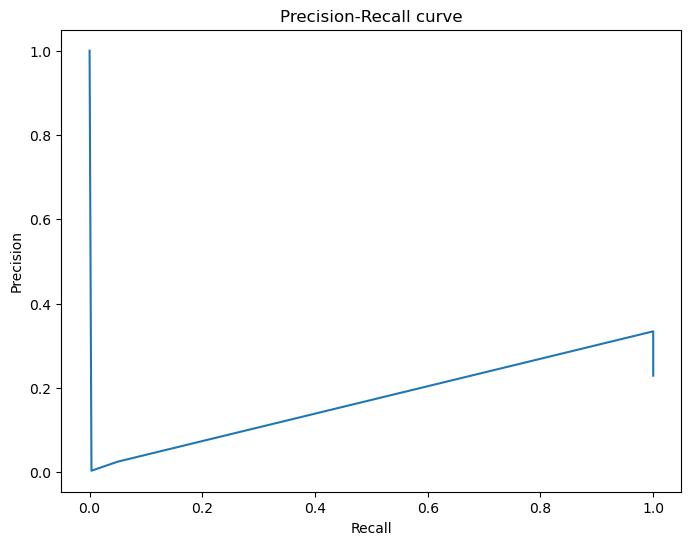

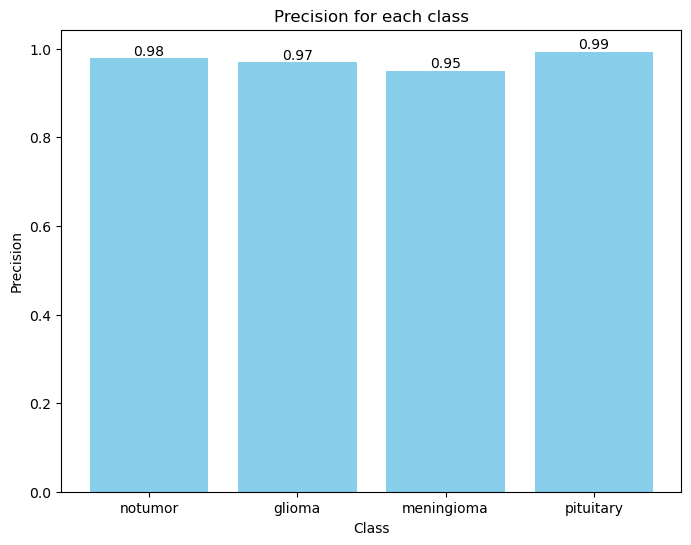

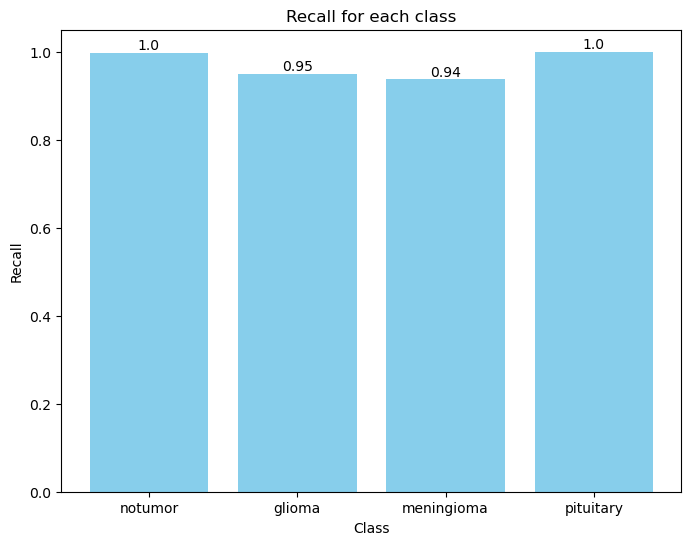

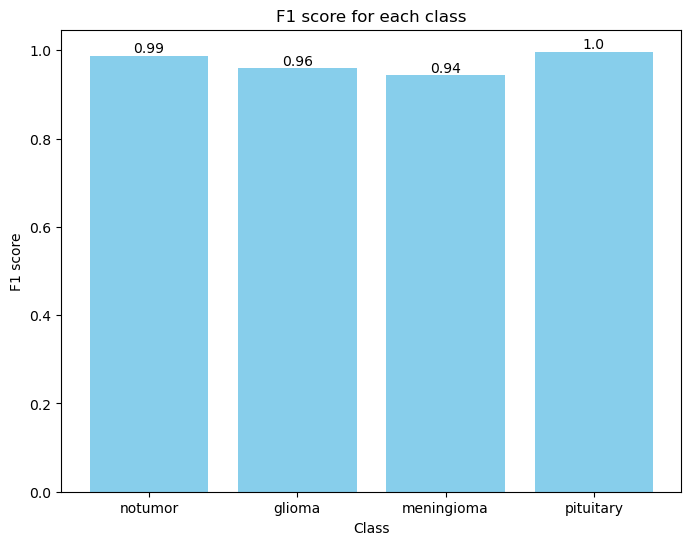

In [29]:
# presnt the classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=classes.keys()))

#plot the precision-recall curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

precision, recall, _ = precision_recall_curve(y_test, y_pred, pos_label=1)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.show()

#high precision and recall values are desired
# high precision means low false positive rate
# high recall means low false negative rate

#plot the precision for each class
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average=None)
plt.figure(figsize=(8, 6))
bars = plt.bar(classes.keys(), precision, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Precision')
plt.title('Precision for each class')

for bar, score in zip(bars, precision):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(score, 2),
             ha='center', va='bottom')

plt.show()

#plot the recall for each class
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred, average=None)
plt.figure(figsize=(8, 6))
bars = plt.bar(classes.keys(), recall, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Recall')
plt.title('Recall for each class')

for bar, score in zip(bars, recall):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(score, 2),
             ha='center', va='bottom')

plt.show()

#plot f1 score for each class = 2 * (precision * recall) / (precision + recall) , both contribute equally hence f1 gives the realiability of a model
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred, average=None)
plt.figure(figsize=(8, 6))
bars = plt.bar(classes.keys(), f1, color='skyblue')
plt.xlabel('Class')
plt.ylabel('F1 score')
plt.title('F1 score for each class')

for bar, score in zip(bars, f1):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(score, 2),
             ha='center', va='bottom')
    
plt.show()

In [30]:
#use SVM with non-linear kernel to classify the data
from sklearn.svm import SVC
model=SVC(kernel='poly',degree=3,C=1,gamma=0.01)
#higher degree may lead to overfitting, too low of gamma may lead to overfitting
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))



Accuracy:  0.969488939740656


[[404   0   1   0]
 [  0 287  10   3]
 [  3  18 281   4]
 [  0   0   1 299]]
Total number of tested samples:  1311
Number of correctly classified samples:  1271


<Figure size 1000x700 with 0 Axes>

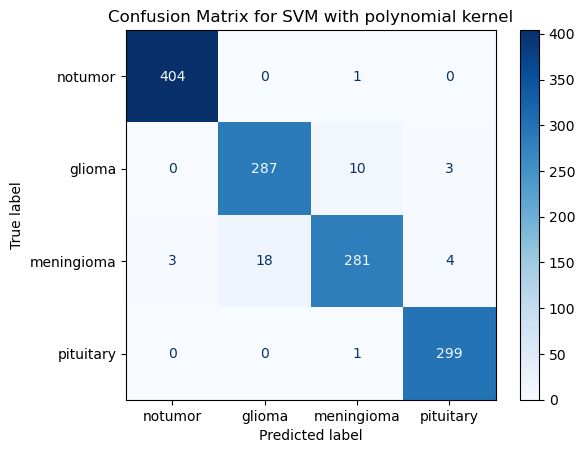

In [31]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

#find number of tested samples
total = np.sum(cm)
print("Total number of tested samples: ", total)
print("Number of correctly classified samples: ", np.trace(cm))


plt.figure(figsize=(10, 7))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes.keys())
disp.plot(cmap='Blues')

plt.title('Confusion Matrix for SVM with polynomial kernel')
plt.show()




              precision    recall  f1-score   support

     notumor       0.99      1.00      1.00       405
      glioma       0.94      0.96      0.95       300
  meningioma       0.96      0.92      0.94       306
   pituitary       0.98      1.00      0.99       300

    accuracy                           0.97      1311
   macro avg       0.97      0.97      0.97      1311
weighted avg       0.97      0.97      0.97      1311



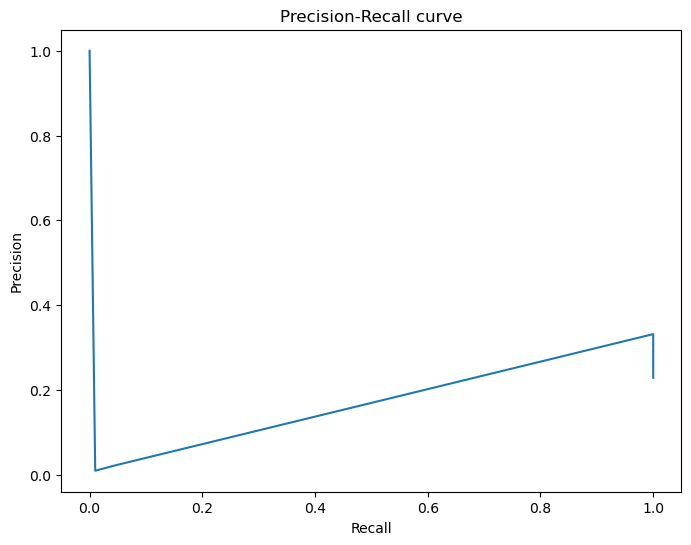

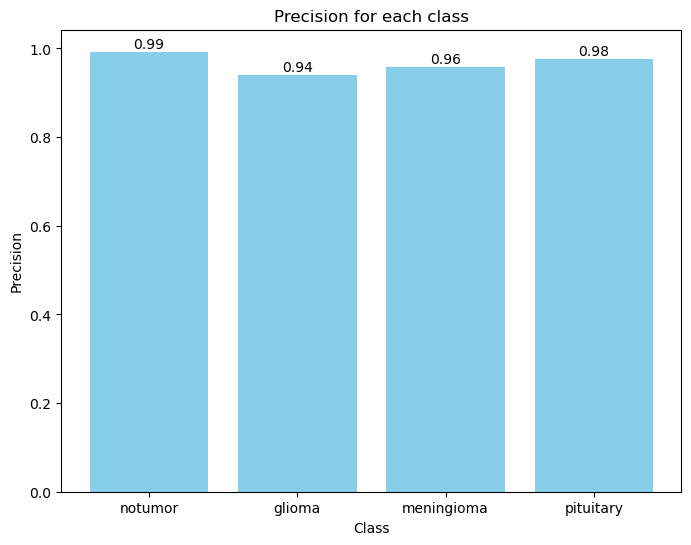

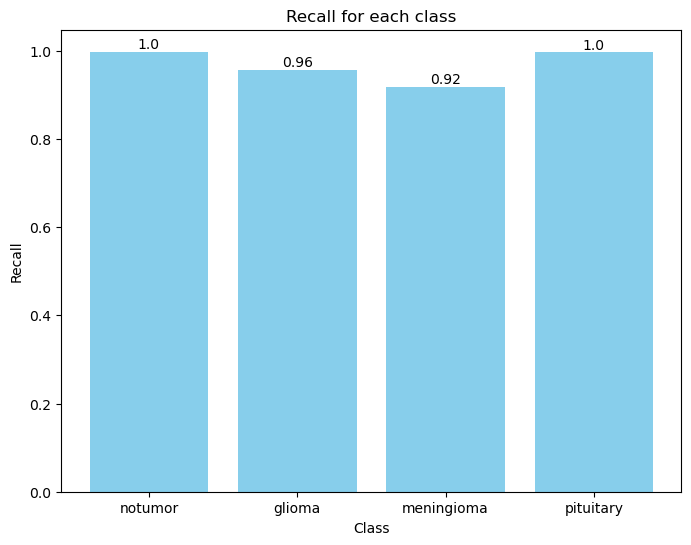

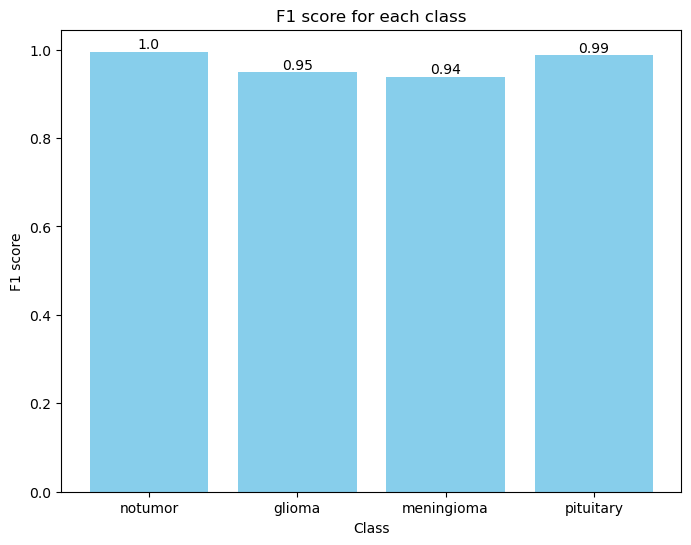

In [32]:
# presnt the classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=classes.keys()))

#plot the precision-recall curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

precision, recall, _ = precision_recall_curve(y_test, y_pred, pos_label=1)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.show()

#high precision and recall values are desired
# high precision means low false positive rate
# high recall means low false negative rate

#plot the precision for each class
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average=None)
plt.figure(figsize=(8, 6))
bars = plt.bar(classes.keys(), precision, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Precision')
plt.title('Precision for each class')

for bar, score in zip(bars, precision):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(score, 2),
             ha='center', va='bottom')

plt.show()

#plot the recall for each class
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred, average=None)
plt.figure(figsize=(8, 6))
bars = plt.bar(classes.keys(), recall, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Recall')
plt.title('Recall for each class')

for bar, score in zip(bars, recall):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(score, 2),
             ha='center', va='bottom')

plt.show()

#plot f1 score for each class = 2 * (precision * recall) / (precision + recall) , both contribute equally hence f1 gives the realiability of a model
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred, average=None)
plt.figure(figsize=(8, 6))
bars = plt.bar(classes.keys(), f1, color='skyblue')
plt.xlabel('Class')
plt.ylabel('F1 score')
plt.title('F1 score for each class')

for bar, score in zip(bars, f1):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(score, 2),
             ha='center', va='bottom')
    
plt.show()

##### Increasing the degree of polynomial or reucing gamma by too much results in overfitting

In [33]:
from sklearn.svm import SVC
model=SVC(kernel='poly',degree=5,C=1,gamma=0.001) # gamma distance considered for classification, C is the regularization parameter
#higher degree may lead to overfitting, too low of gamma may lead to overfitting
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))

Accuracy:  0.4080854309687262
